<a href="https://colab.research.google.com/github/saniniiipaninii/pwd_checker_project/blob/main/pwd_checker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import string
import getpass

def check_pwd_strength():
    password = getpass.getpass("Enter Password: ")
    strength = 0
    remarks = ' '
    lower_count = upper_count = num_count = wspace_count = special_count = 0

    for char in list(password):
        if char in string.ascii_lowercase:
            lower_count += 1

        elif char in string.ascii_uppercase:
            upper_count +=1
        elif char in string.digits:
            num_count += 1
        elif char == ' ':
            wspace_count += 1
        else:
            special_count += 1

    if lower_count >= 1:
        strength += 1
    if upper_count >= 1:
        strength += 1
    if num_count >= 1:
        strength += 1
    if wspace_count >= 1:
        strength += 1
    if special_count >= 1:
        strength += 1

    if strength == 1:
        remarks = "Very very very bad password! Please change this to a stronger password!"
    elif strength == 2:
        remarks = "Not a good password! Please change to a stronger password!"
    elif strength == 3:
        remarks = "Very weak password, consider changing for better security."
    elif strength == 4:
        remarks = "Not a bad password, but can definitely be better."
    elif strength == 5:
        remarks = "A very strong password indeed!"

    print('Your password has: ')
    print(f"{lower_count} lowercase characters")
    print(f"{upper_count} uppercase characters")
    print(f"{num_count} numerical characters")
    print(f"{wspace_count} whitespace characters")
    print(f"{special_count} special characters")

    print(f"Password Strength is:{strength}")
    print(f"Hint: {remarks}")

def ask_password(another_password = False):
    valid = False
    if another_password:
        choice = input('Do you want to enter another password (y/n): ')
    else:
        choice = input('Would you like to check your password strength (y/n): ')

    while not valid:
        if choice.lower() == 'y':
            return True
        elif choice.lower() == 'n':
            return False
        else:
            print('Invalid, Please Try Again')

if __name__ == '__main__':
    print('+++ Welcome to the Password Check +++')

    ask = ask_password()

    while ask:
        check_pwd_strength()
        ask = ask_password(True)
    print("Goodbye! Thanks for using the password checker.")

+++ Welcome to the Password Check +++
Would you like to check your password strength (y/n): y
Enter Password: ··········
Your password has: 
4 lowercase characters
4 uppercase characters
2 numerical characters
0 whitespace characters
6 special characters
Password Strength is:4
Hint: Not a bad password, but can definitely be better.
Do you want to enter another password (y/n): n
Goodbye! Thanks for using the password checker.


Extracted files: ['rockyou.txt']
['123456', '12345', '123456789', 'password', 'iloveyou', 'princess', '1234567', 'rockyou', '12345678', 'abc123', 'nicole', 'daniel', 'babygirl', 'monkey', 'lovely', 'jessica', '654321', 'michael', 'ashley', 'qwerty', '111111', 'iloveu', '000000', 'michelle', 'tigger', 'sunshine', 'chocolate', 'password1', 'soccer', 'anthony', 'friends', 'butterfly', 'purple', 'angel', 'jordan', 'liverpool', 'justin', 'loveme', 'fuckyou', '123123', 'football', 'secret', 'andrea', 'carlos', 'jennifer', 'joshua', 'bubbles', '1234567890', 'superman', 'hannah']


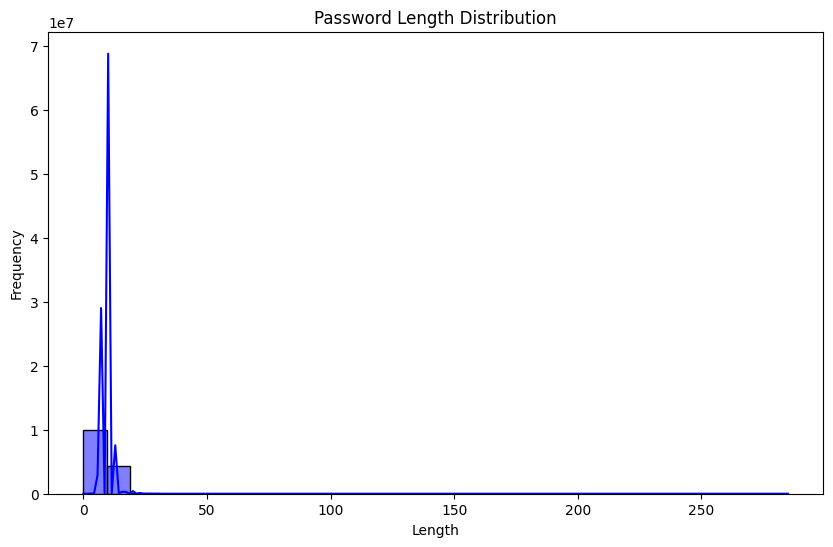

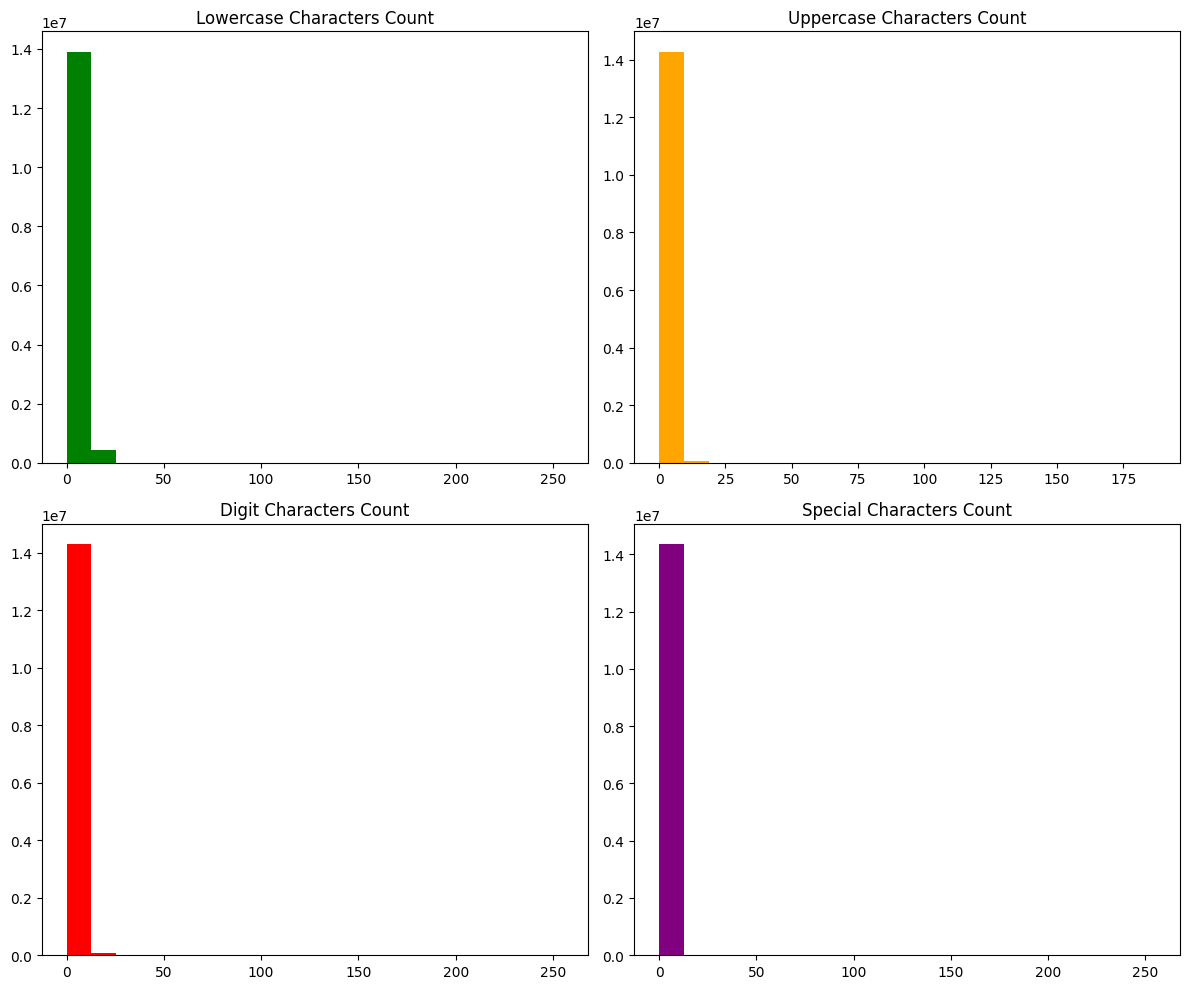

Most Common Passwords:
à¹: 532
: 230
à¸à¹: 102
/à¹: 54
-à¹: 38
à¸à¹: 31
à¸à¸à¹: 30
à¸ à¹: 29
à¸: 28
à¸¶à¹: 21


In [12]:
## we want to visualize common password patterns to raise awareness on weak password
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns

zip_file_path = "/content/rockyou.txt.zip"
extract_folder = "/content/rockyou.txt"

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

extracted_files = os.listdir(extract_folder)
print("Extracted files:", extracted_files)

txt_file_path = os.path.join(extract_folder, 'rockyou.txt')  # Replace with the correct file name

with open(txt_file_path, 'r', encoding='ISO-8859-1') as file:
    passwords = file.read().splitlines()
print(passwords[:50])  # Show the first 10 passwords for verification

# Preprocess the passwords
password_lengths = [len(password) for password in passwords]
lowercase_count = [sum(1 for c in password if c in string.ascii_lowercase) for password in passwords]
uppercase_count = [sum(1 for c in password if c in string.ascii_uppercase) for password in passwords]
digit_count = [sum(1 for c in password if c in string.digits) for password in passwords]
special_count = [sum(1 for c in password if c in string.punctuation) for password in passwords]

# Plot: Password Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(password_lengths, kde=True, bins=30, color='blue')
plt.title("Password Length Distribution")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes[0, 0].hist(lowercase_count, bins=20, color='green')
axes[0, 0].set_title("Lowercase Characters Count")
axes[0, 1].hist(uppercase_count, bins=20, color='orange')
axes[0, 1].set_title("Uppercase Characters Count")
axes[1, 0].hist(digit_count, bins=20, color='red')
axes[1, 0].set_title("Digit Characters Count")
axes[1, 1].hist(special_count, bins=20, color='purple')
axes[1, 1].set_title("Special Characters Count")

plt.tight_layout()
plt.show()

from collections import Counter
password_counts = Counter(passwords)
common_passwords = password_counts.most_common(10)

print("Most Common Passwords:")
for password, count in common_passwords:
    print(f"{password}: {count}")
